<a href="https://colab.research.google.com/github/afrojaakter/100-days-of-code/blob/master/Viantinterview_version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Model 1: One Hot **Encoding**

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

In [3]:
#Generating Data
df_inputs = np.arange(2000)
np.random.shuffle(df_inputs)

def modular_fn(X):
  ''' Takes input as integers and returns modular the input as: x % 500'''
  return X % 500

df_labels = modular_fn(df_inputs)
print('Input data shapre {}, Output data shape {}'.format(df_inputs.shape, df_labels.shape))

Input data shapre (2000,), Output data shape (2000,)


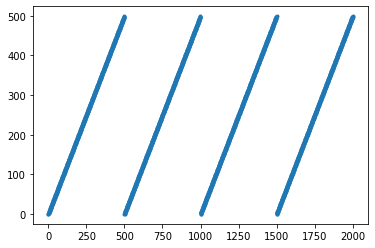

In [4]:
plt.plot(np.arange(2000), modular_fn(np.arange(2000)),'.')

In [5]:
#some data population
np.random.seed(42) # to prevent dataset not from changing in every run
print('Input dataset {} \nOutput dataset {}'.format(df_inputs, df_labels))

Input dataset [1986  437 1033 ...  482  389  231] 
Output dataset [486 437  33 ... 482 389 231]


In [22]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
df_ohe_input = ohe.fit_transform(df_inputs.reshape(-1,1))
df_labels = modular_fn(df_inputs.reshape(-1,1))

df_ohe_labels = ohe.fit_transform(df_labels.reshape(-1,1))
print(df_ohe_input.shape, df_ohe_labels.shape)

NameError: ignored

In [7]:
#creating train and test dataset
train_data_size = int(2000*0.7) # 70% is for training 

# training data
train_inputs = df_ohe_input[:train_data_size]
train_labels = df_labels[:train_data_size]

# validation data
valid_data_size = int(train_data_size*0.2)
valid_inputs = train_inputs[:valid_data_size]
valid_labels = train_labels[:valid_data_size]

train_inputs = train_inputs[valid_data_size:]
train_labels = train_labels[valid_data_size:]

# test data
test_inputs = df_ohe_input[train_data_size:]
test_labels = df_labels[train_data_size:]

print('Train data size {} \nValidation data size {}\ntest data size {}'
      .format(train_inputs.shape, valid_inputs.shape, test_inputs.shape))

Train data size (1120, 2000) 
Validation data size (280, 2000)
test data size (600, 2000)


In [8]:
train_labels.shape, valid_labels.shape, test_labels.shape

((1120, 1), (280, 1), (600, 1))

In [21]:
model = keras.models.Sequential([
            keras.layers.Dense(20, activation='relu', input_dim=2000),
            keras.layers.Dense(20, activation='relu'),
            keras.layers.Dense(500, activation='softmax')
    ])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_inputs, 
                    train_labels,
                    epochs=50,
                    batch_size=32,
                    validation_data= (valid_inputs, valid_labels))
                    


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_2/dense_6/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_2/dense_6/embedding_lookup_sparse/Reshape:0", shape=(None, 20), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_2/dense_6/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


35/35 [==============================] - 1s 8ms/step - loss: 6.2170 - accuracy: 0.0027 - val_loss: 6.2186 - val_accuracy: 0.0000e+00
Epoch 2/50
35/35 [==============================] - 0s 4ms/step - loss: 6.2083 - accuracy: 0.0045 - val_loss: 6.2242 - val_accuracy: 0.0000e+00
Epoch 3/50
35/35 [==============================] - 0s 3ms/step - loss: 6.1970 - accuracy: 0.0054 - val_loss: 6.2386 - val_accuracy: 0.0000e+00
Epoch 4/50
35/35 [==============================] - 0s 4ms/step - loss: 6.1727 - accuracy: 0.0071 - val_loss: 6.2774 - val_accuracy: 0.0000e+00
Epoch 5/50
35/35 [==============================] - 0s 3ms/step - loss: 6.1320 - accuracy: 0.0080 - val_loss: 6.3496 - val_accuracy: 0.0000e+00
Epoch 6/50
35/35 [==============================] - 0s 3ms/step - loss: 6.0848 - accuracy: 0.0071 - val_loss: 6.4489 - val_accuracy: 0.0000e+00
Epoch 7/50
35/35 [==============================] - 0s 4ms/step - loss: 6.0343 - accuracy: 0.0054 - val_loss: 6.5100 - val_accuracy: 0.0000e+00
Epo

Text(0.5, 1.0, 'training and Validation Loss')

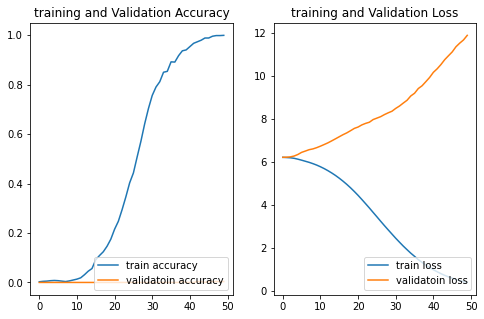

In [23]:
#plotting loss and accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = 50
epochs_range = range(epochs)
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='train accuracy')
plt.plot(epochs_range, val_acc, label='validatoin accuracy')
plt.legend(loc='lower right')
plt.title('training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='train loss')
plt.plot(epochs_range, val_loss, label='validatoin loss')
plt.legend(loc='lower right')
plt.title('training and Validation Loss')

In [16]:
# few true test_labels and predicted labels
test_labels[:10].T, preds[:10]

(array([[ 48, 219,  46, 482, 211, 131, 383,   7, 255, 349]]),
 [268, 483, 483, 483, 483, 483, 483, 483, 483, 483])

As we see the model performs poorly. The model memorize the train data but don't generalize on validation data at all. 

This is an underfittiing situation and this happens when we don't have eoungh data to train the model or we the number of features are more than the number of example in the training data, which is waht happening here. After applying one hot encodding to the data we have 1120 train exaples and 2000 features per example. Which is a clear indication that model might not learn all the patterns in the dataset.

### Model 2: COnverting input data to Bit-wise
The input data has 11 features now and we are trying to develop a model to classifiy 500 different categories. 

In [2]:
!pip install python_toolbox

     |████████████████████████████████| 529 kB 14.6 MB/s 


In [11]:
np.arange(0,2 ** 11-48, 1)

array([   0,    1,    2, ..., 1997, 1998, 1999])

(1120, 21) (1120, 500) (280, 21) (280, 500) (600, 21) (600, 500)
Epoch 1/250
23/23 [==============================] - 1s 13ms/step - loss: 6.2173 - accuracy: 0.0018 - val_loss: 6.2195 - val_accuracy: 0.0000e+00
Epoch 2/250
23/23 [==============================] - 0s 6ms/step - loss: 6.2035 - accuracy: 0.0036 - val_loss: 6.2393 - val_accuracy: 0.0000e+00
Epoch 3/250
23/23 [==============================] - 0s 5ms/step - loss: 6.1668 - accuracy: 0.0045 - val_loss: 6.3565 - val_accuracy: 0.0000e+00
Epoch 4/250
23/23 [==============================] - 0s 6ms/step - loss: 6.0846 - accuracy: 0.0054 - val_loss: 6.5105 - val_accuracy: 0.0000e+00
Epoch 5/250
23/23 [==============================] - 0s 6ms/step - loss: 5.9724 - accuracy: 0.0134 - val_loss: 6.5521 - val_accuracy: 0.0000e+00
Epoch 6/250
23/23 [==============================] - 0s 6ms/step - loss: 5.7863 - accuracy: 0.0188 - val_loss: 6.5673 - val_accuracy: 0.0000e+00
Epoch 7/250
23/23 [==============================] - 0s 6ms/step

Text(0.5, 1.0, 'training and Validation Loss')

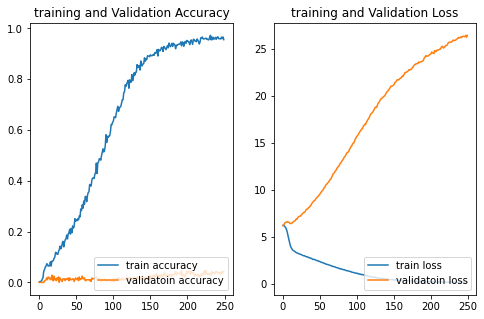

In [66]:
from python_toolbox import random_tools
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


def modular_fn(X):
  ''' Takes input as integers and returns modular the input as: x % 500'''
  return X % 500

data_population = random_tools.shuffled(range(2 ** 11-48)) #np.arange(0,2 ** 11-48, 1)
data = []
for d in data_population:
  arr = []
  for i in range(20, -1, -1):
      arr.append((d & 1<<i)>>i)
  data.append(np.array(arr))
input_data = np.array(data)
label_data = np.array(list(map(modular_fn, data_population)))

ohe = OneHotEncoder()
label_data = ohe.fit_transform(label_data.reshape(-1,1)).todense()
#Splitting dataset into train, validation and test set
# Train data is 70% to the total dataset and test data is 30% 
# validation data is 20% of the train data

train_inputs = input_data[:1120,:]
train_labels = label_data[:1120]

valid_inputs = input_data[1120:1400,:]
valid_labels = label_data[1120:1400]

test_inputs = input_data[1400:,:]
test_labels = label_data[1400:]
print(train_inputs.shape, train_labels.shape,
      valid_inputs.shape, valid_labels.shape, 
      test_inputs.shape, test_labels.shape)


from tensorflow.keras import initializers
from tensorflow.keras import regularizers
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)

epochs = 250
model = keras.models.Sequential([
        keras.layers.Dense(128, activation='relu', input_dim=train_inputs.shape[1],
                          kernel_initializer=initializers.RandomNormal(stddev=0.01),
                          bias_initializer=initializers.Zeros(),
                          kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                          bias_regularizer=regularizers.l2(1e-4),
                          activity_regularizer=regularizers.l2(1e-5) ),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(500, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=2)]
history = model.fit(train_inputs,train_labels, 
            epochs=epochs, 
            batch_size=50, 
            verbose = 1,
            validation_data=(valid_inputs, valid_labels))

preds = model.predict(test_inputs)

#plotting loss and accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='train accuracy')
plt.plot(epochs_range, val_acc, label='validatoin accuracy')
plt.legend(loc='lower right')
plt.title('training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='train loss')
plt.plot(epochs_range, val_loss, label='validatoin loss')
plt.legend(loc='lower right')
plt.title('training and Validation Loss')


In [62]:
valid_preds = model.predict(valid_inputs)
[np.argmax(preds[i]) for i in range(valid_preds.shape[0])][:10], [np.argmax(valid_labels[i]) for i in range(valid_labels.shape[0])][:10]

([77, 336, 107, 40, 182, 155, 403, 9, 188, 462],
 [271, 168, 199, 193, 338, 453, 292, 213, 173, 1])

In [61]:
preds = model.predict(test_inputs)
[np.argmax(preds[i]) for i in range(preds.shape[0])][:10], [np.argmax(test_labels[i]) for i in range(test_labels.shape[0])][:10]

([77, 336, 107, 40, 182, 155, 403, 9, 188, 462],
 [81, 320, 99, 40, 190, 167, 399, 497, 204, 450])

As we see the model is preforming well in train data but fails to perform in validation or test data. This is overfitting, where model momorize train data and fails to preform on test or validation data. 
I used regualazitation technique and dropout but the model still seems to perform poorly. 

### Model 3: 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


Epoch 1/2000
23/23 [==============================] - 1s 11ms/step - loss: 6.2204 - accuracy: 0.0027 - val_loss: 6.2198 - val_accuracy: 0.0036
Epoch 2/2000
23/23 [==============================] - 0s 4ms/step - loss: 6.2197 - accuracy: 0.0027 - val_loss: 6.2198 - val_accuracy: 0.0036
Epoch 3/2000
23/23 [==============================] - 0s 4ms/step - loss: 6.2189 - accuracy: 0.0027 - val_loss: 6.2197 - val_accuracy: 0.0036
Epoch 4/2000
23/23 [==============================] - 0s 5ms/step - loss: 6.2181 - accuracy: 0.0027 - val_loss: 6.2197 - val_accuracy: 0.0036
Epoch 5/2000
23/23 [==============================] - 0s 4ms/step - loss: 6.2174 - accuracy: 0.0027 - val_loss: 6.2196 - val_accuracy: 0.0036
Epoch 6/2000
23/23 [==============================] - 0s 4ms/step - loss: 6.2167 - accuracy: 0.0027 - val_loss: 6.2196 - val_accuracy: 0.0036
Epoch 7/2000
23/23 [==============================] - 0s 4ms/step - loss: 6.2159 - accuracy: 0.0027 - val_loss: 6.2195 - val_accuracy: 0.0036
Epoch

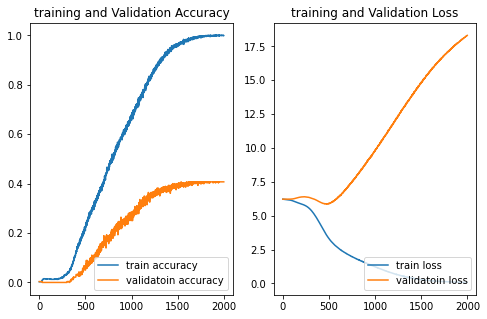

In [68]:
import keras.models
import numpy as np
from python_toolbox import random_tools

RADIX = 500
FEATURE_BITS = 11

def _get_number(vector):
    return sum(x * 2 ** i for i, x in enumerate(vector))

def _get_mod_result(vector):
    return _get_number(vector) % RADIX

def _number_to_vector(number):
    binary_string = bin(number)[2:]
    if len(binary_string) > FEATURE_BITS:
        raise NotImplementedError
    bits = (((0,) * (FEATURE_BITS - len(binary_string))) +
            tuple(map(int, binary_string)))[::-1]
    assert len(bits) == FEATURE_BITS
    return np.c_[bits]

def get_mod_result_vector(vector):
    v = np.repeat(0, 500)
    v[_get_mod_result(vector)] = 1
    return v

epochs = 2000

def main():
    train_inputs = np.random.randint(2, size=(1120, FEATURE_BITS))
    train_labels = np.vstack(map(get_mod_result_vector, train_inputs))

    valid_inputs = np.random.randint(2, size=(280, FEATURE_BITS))
    valid_labels = np.vstack(map(get_mod_result_vector, valid_inputs))

    test_input = random_tools.shuffled(range(2 ** FEATURE_BITS - 49))[:600]

    model = keras.models.Sequential([
            keras.layers.Dense(20, activation='relu', input_dim=FEATURE_BITS),
            keras.layers.Dense(20, activation='relu'),
            keras.layers.Dense(500, activation='softmax')
    ])
    model.compile(optimizer='sgd',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_inputs,train_labels, 
                        epochs=epochs, 
                        batch_size=50, 
                        verbose = 1,
                        validation_data=(valid_inputs, valid_labels))
    def predict(number):
        preds = model.predict(_number_to_vector(number))
        return np.argmax(preds)
        
    def is_correct_for_number(x):
        return bool(predict(x) == x % RADIX)
    print('Total accuracy:')
    print(sum(map(is_correct_for_number, test_input)) / len(test_input))

    #plotting loss and accuracy
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)
    plt.figure(figsize=(8,5))
    plt.subplot(1,2,1)
    plt.plot(epochs_range, acc, label='train accuracy')
    plt.plot(epochs_range, val_acc, label='validatoin accuracy')
    plt.legend(loc='lower right')
    plt.title('training and Validation Accuracy')

    plt.subplot(1,2,2)
    plt.plot(epochs_range, loss, label='train loss')
    plt.plot(epochs_range, val_loss, label='validatoin loss')
    plt.legend(loc='lower right')
    plt.title('training and Validation Loss')

if __name__ == '__main__':
    main()

### Model 4: 

In [ ]:
import keras.models
import numpy as np
from python_toolbox import random_tools
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

RADIX = 500
FEATURE_BITS = 10

def _get_number(vector):
    return sum(x * 2 ** i for i, x in enumerate(vector))

def _get_mod_result(vector):
    return _get_number(vector) % RADIX

def _number_to_vector(number):
    binary_string = bin(number)[2:]
    if len(binary_string) > FEATURE_BITS:
        raise NotImplementedError
    bits = (((0,) * (FEATURE_BITS - len(binary_string))) +
            tuple(map(int, binary_string)))[::-1]
    assert len(bits) == FEATURE_BITS
    return np.c_[bits]


def get_mod_result_vector(vector):
    v = np.repeat(0, 500)
    v[_get_mod_result(vector)] = 1
    return v

# data generation and splitting into train, validation and test data
data = np.random.randint(2, size=(2000, FEATURE_BITS))
labels = np.vstack(map(get_mod_result_vector, data))

train_inputs, test_inputs, train_labels, test_labels = train_test_split(
data, labels, test_size=0.3, random_state=42)

train_inputs, valid_inputs, train_labels, valid_labels = train_test_split(
train_inputs, train_labels, test_size=0.2, random_state=42)

model = keras.models.Sequential([
        keras.layers.Dense(10, activation='relu', input_dim=FEATURE_BITS),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(500, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


epochs = 2000
history = model.fit(train_inputs, train_labels, 
                    epochs=epochs, batch_size=50, 
                    verbose = 1,
                    validation_data = (valid_inputs, valid_labels))

preds = model.predict(test_inputs)
test_preds = [np.argmax(preds[i]) for i in range(preds.shape[0])]
test_true_labels = [np.argmax(test_labels[i]) for i in range(test_labels.shape[0])]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


Epoch 1/2000
23/23 [==============================] - 1s 9ms/step - loss: 6.2143 - accuracy: 0.0018 - val_loss: 6.2144 - val_accuracy: 0.0000e+00
Epoch 2/2000
23/23 [==============================] - 0s 3ms/step - loss: 6.2042 - accuracy: 0.0045 - val_loss: 6.2119 - val_accuracy: 0.0000e+00
Epoch 3/2000
23/23 [==============================] - 0s 3ms/step - loss: 6.1877 - accuracy: 0.0125 - val_loss: 6.2076 - val_accuracy: 0.0000e+00
Epoch 4/2000
23/23 [==============================] - 0s 2ms/step - loss: 6.1439 - accuracy: 0.0036 - val_loss: 6.2065 - val_accuracy: 0.0036
Epoch 5/2000
23/23 [==============================] - 0s 2ms/step - loss: 6.0453 - accuracy: 0.0045 - val_loss: 6.2659 - val_accuracy: 0.0036
Epoch 6/2000
23/23 [==============================] - 0s 3ms/step - loss: 5.9236 - accuracy: 0.0089 - val_loss: 6.3570 - val_accuracy: 0.0000e+00
Epoch 7/2000
23/23 [==============================] - 0s 2ms/step - loss: 5.8224 - accuracy: 0.0143 - val_loss: 6.4306 - val_accurac

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='train accuracy')
plt.plot(epochs_range, val_acc, label='validatoin accuracy')
plt.legend(loc='lower right')
plt.title('training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='train loss')
plt.plot(epochs_range, val_loss, label='validatoin loss')
plt.legend(loc='lower right')
plt.title('training and Validation Loss')

In [ ]:
test_true_labels[:10], test_preds[:10]

In [ ]:
n, bins, patches = plt.hist(loss,30, density=True, facecolor='g', alpha=0.75)
plt.title('Histogram of Entropy Loss')
plt.xlabel('Entropy Loss')
plt.show()

Here it seems the model is performing little better on validation data as well on the test data. In the avobe cell we see the model predicted modulus valued vs the true modulus value for 10 example integers.

Here one thing to notice, even though the loss was increasing the accuracy was increasing as well. This is because of the entropy loss and accuracy are not inversely corellate to each other. 

One important thing to note as well is that the cross entropy is not a bounded loss. Which means that a single very wrong prediction can potentially make your loss "blow up". In that sense it is possible that there are one or a few outliers that are classified extremely badly and that are making the loss explode, but at the same time your model is still learning on the rest of the dataset or simply the model is overfitting.

###Model 5:

In [47]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import r2_score

maxint = 2**11 - 49

a = np.random.randint(1, maxint, 1400).reshape(-1,1)
n = np.random.randint(1, maxint, 1400).reshape(-1,1)

a_test = np.random.randint(1, maxint, 600).reshape(-1,1)
n_test = np.random.randint(1, maxint, 600).reshape(-1,1)

In [48]:
y = a%500
y_test = a_test%500

In [49]:
y.shape, y_test.shape

((1400, 1), (600, 1))

In [ ]:
def num2bin(num): 
  return [int(c) for c in '{:08b}'.format(num)]

def bin2num(b):
  return int(''.join([str(n) for n in b]),2)

def list2bin(numlist):
  return np.array([num2bin(num[0]) for num in numlist])

def list2num(binlist):
  return [bin2num(b) for b in binlist]

a = list2bin(a)
n = num2bin(500)

a_test = list2bin(a_test)

y = list2bin(y)
y_test = list2bin(y_test)

In [ ]:
y_test.shape,y.shape, a.shape

In [ ]:
X_train = a[:1100]
X_val = a[1100:]
y_train = y[:1100]
y_val = y[1100:]

In [ ]:
X_val.shape, X_train.shape

In [ ]:
model = MLPClassifier()
model.fit(X_train, y_train)

In [ ]:
y_val_pred = list2num(model.predict(X_val))
y_val_true = list2num(y_val)
y_val_pred[:16], y_val_true[:16]

In [ ]:
r2_score(y_val_true, y_val_pred)

In [ ]:
y_test_pred = list2num(model.predict(a_test))
r2_score(list2num(y_test), y_test_pred)

### Model 6:

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
df_ohe_input = ohe.fit_transform(df_inputs.reshape(-1,1))
df_labels = modular_fn(df_inputs.reshape(-1,1))

df_ohe_labels = ohe.fit_transform(df_labels.reshape(-1,1))
print(df_ohe_input.shape, df_ohe_labels.shape)

#creating train and test dataset
train_data_size = int(2000*0.7) # 70% is for training 

# training data
train_inputs = df_ohe_input[:train_data_size]
train_labels = df_ohe_labels[:train_data_size]

# validation data
valid_data_size = int(train_data_size*0.2)
valid_inputs = train_inputs[:valid_data_size]
valid_labels = train_labels[:valid_data_size]

train_inputs = train_inputs[valid_data_size:]
train_labels = train_labels[valid_data_size:]

# test data
test_inputs = df_ohe_input[train_data_size:]
test_labels = df_ohe_labels[train_data_size:]

print('Train data size {} \nValidation data size {}\ntest data size {}'
      .format(train_inputs.shape, valid_inputs.shape, test_inputs.shape))

model2 = MLPClassifier()
model2.fit(train_inputs,
           train_labels)

y_val_pred = model.predict(valid_inputs)
preds = [np.argmax(y_val_pred[i]) for i in range(len(y_val_pred))]
true_preds = [np.argmax(valid_labels[i]) for i in range(valid_labels.shape[0])]
print(preds[:10], true_preds[:10])

r2_score(true_preds, preds)